<a href="https://colab.research.google.com/github/AmonAmanyabyona/AI_systems/blob/main/learning_ML_using_stanford_dogs_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/midterm.zip

Archive:  /content/drive/MyDrive/midterm.zip
replace midterm/lists.tar? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
%cd /content/midterm

/content/midterm


In [ ]:
!ls

annotation.tar	      images.tar  normalized_images	 test_data.mat
fully_resized_images  lists.tar   normalized_test_data	 train_data.mat
Images		      midterm	  normalized_train_data


File Information:
 - images/
    -- Images of different breeds are in separate folders
 - annotations/
    -- Bounding box annotations of images
 - file_list.mat
    -- List of all files in the dataset
 - train_list.mat
    -- List and labels of all training images in dataset
 - test_list.mat
    -- List and labels of all test images in dataset

Train splits:
 In order to test with fewer than 100 images per class, the first
 n indices for each class in train_list.mat were used, where n is
 the number of training images per class.

Features (train_data.mat, test_data.mat):
 - train_data/test_data
   -- contains the feature matrix after histogram intersection kernel has been applied
 - train_fg_data/test_fg_data
   -- contains the feature matrix before applying the histogram intersection kernel
 - train_info/test_info
   -- contains the labels and ids for the corresponding image in the feature matrix

In [ ]:
import tarfile
!tar -xf images.tar  # This command uses the shell to untar the archive


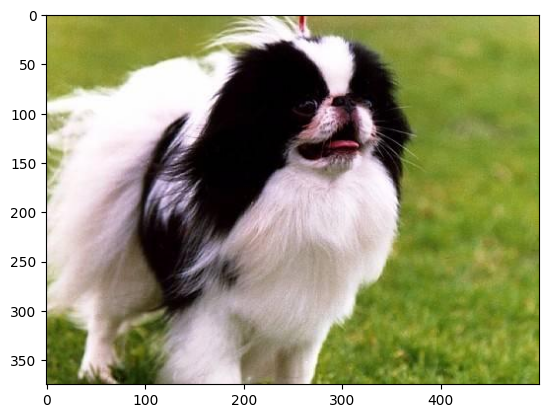

In [ ]:

import matplotlib.pyplot as plt
from PIL import Image

# Replace with the path to your actual image
image_path = '/content/midterm/Images/n02085782-Japanese_spaniel/n02085782_1039.jpg'

# Load the image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
#plt.axis('off')  # Hide the axis
plt.show()

The image size is: (500, 375) and the mode is: RGB


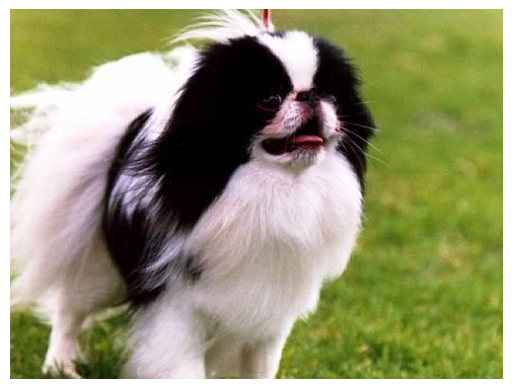

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Replace with the path to your actual image
image_path = '/content/midterm/Images/n02085782-Japanese_spaniel/n02085782_1039.jpg'

# Load the image
image = Image.open(image_path)

# Get the size and mode of the image
image_size = image.size
image_mode = image.mode

# Print the shape of the image
print(f"The image size is: {image_size} and the mode is: {image_mode}")

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

**Histogram of Image Widths**


The maximum image width is: 3264 pixels
The minimum image width is: 97 pixels
Number of images exceeding 500px width: 947
Number of images below 0px width: 0


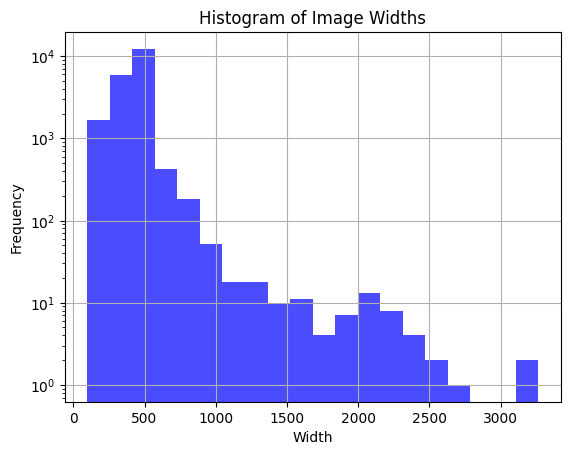

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Change directory to the images folder
os.chdir('/content/midterm/Images')

# List all images
all_images = []
for breed in os.listdir():
    if os.path.isdir(breed):
        all_images.extend([os.path.join(breed, img) for img in os.listdir(breed) if img.endswith('.jpg')])

# Get dimensions of all images
widths = []
for img_path in all_images:
    with Image.open(img_path) as img:
        widths.append(img.size[0])

# Find the maximum and minimum image widths
max_width = max(widths)
min_width = min(widths)

# Print out the maximum and minimum sizes
print(f"The maximum image width is: {max_width} pixels")
print(f"The minimum image width is: {min_width} pixels")



threshold_max = 500  # Maximum acceptable width (adjust as needed)
threshold_min = 0  # Minimum acceptable width (adjust as needed)

num_too_big = sum(width > threshold_max for width in widths)
num_too_small = sum(width < threshold_min for width in widths)

print(f"Number of images exceeding {threshold_max}px width: {num_too_big}")
print(f"Number of images below {threshold_min}px width: {num_too_small}")


# Plot histogram of widths
#plt.hist(widths, bins=10, color='blue', alpha=0.7)
plt.hist(widths, bins=20, color='blue', alpha=0.7, log=True)

plt.title('Histogram of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Histogram of Image Heights**


The maximum image height is: 2562 pixels
The minimum image height is: 100 pixels
Number of images exceeding 500px height: 702
Number of images below 0px height: 0


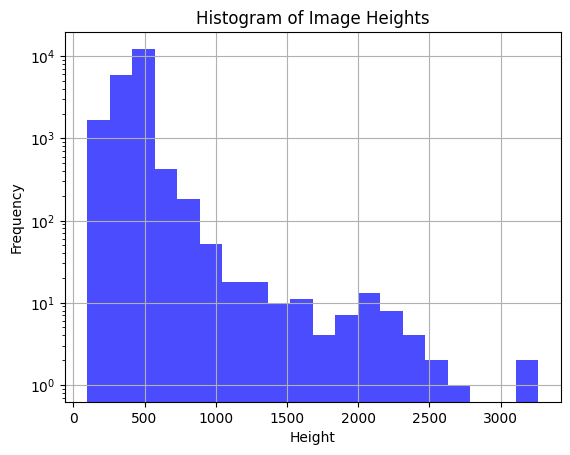

In [ ]:
heights = []
for img_path in all_images:
    with Image.open(img_path) as img:
        heights.append(img.size[1])

# Find the maximum and minimum image heights
max_height = max(heights)
min_height = min(heights)

# Print out the maximum and minimum sizes
print(f"The maximum image height is: {max_height} pixels")
print(f"The minimum image height is: {min_height} pixels")




threshold_max = 500  # Maximum acceptable height (adjust as needed)
threshold_min = 0  # Minimum acceptable height (adjust as needed)

num_too_big = sum(height > threshold_max for height in heights)
num_too_small = sum(height < threshold_min for height in heights)

print(f"Number of images exceeding {threshold_max}px height: {num_too_big}")
print(f"Number of images below {threshold_min}px height: {num_too_small}")


# Plot histogram of heights
#plt.hist(heights, bins=10, color='green', alpha=0.7)
plt.hist(widths, bins=20, color='blue', alpha=0.7, log=True)

plt.title('Histogram of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**AFTER RESIZING IMAGES TO (150,150) USING PYCHARM I IMPORTED THEM THEN HERE'S SOME VISUALIZATION**

The maximum image width is: 150 pixels
The minimum image width is: 150 pixels
Number of images exceeding 150px width: 0
Number of images below 0px width: 0


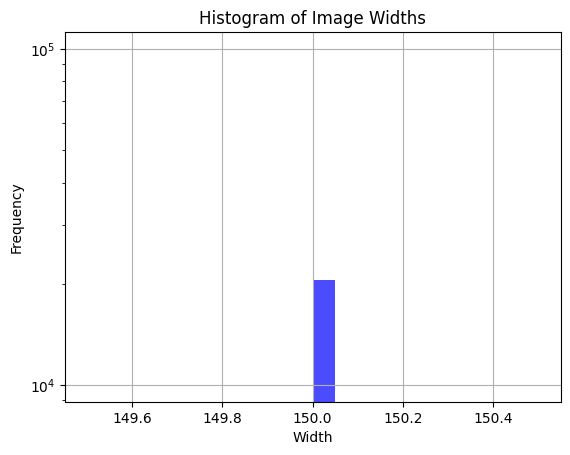

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Change directory to the images folder
os.chdir('/content/midterm/fully_resized_images')

# List all images
all_images = []
for breed in os.listdir():
    if os.path.isdir(breed):
        all_images.extend([os.path.join(breed, img) for img in os.listdir(breed) if img.endswith('.jpg')])

# Get dimensions of all images
widths = []
for img_path in all_images:
    with Image.open(img_path) as img:
        widths.append(img.size[0])

# Find the maximum and minimum image widths
max_width = max(widths)
min_width = min(widths)

# Print out the maximum and minimum sizes
print(f"The maximum image width is: {max_width} pixels")
print(f"The minimum image width is: {min_width} pixels")



threshold_max = 150  # Maximum acceptable width (adjust as needed)
threshold_min = 0  # Minimum acceptable width (adjust as needed)

num_too_big = sum(width > threshold_max for width in widths)
num_too_small = sum(width < threshold_min for width in widths)

print(f"Number of images exceeding {threshold_max}px width: {num_too_big}")
print(f"Number of images below {threshold_min}px width: {num_too_small}")


# Plot histogram of widths
#plt.hist(widths, bins=10, color='blue', alpha=0.7)
plt.hist(widths, bins=20, color='blue', alpha=0.7, log=True)

plt.title('Histogram of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Interpretation**
The histogram shows that all the images were resized to width of 150

**This is for height**

The maximum image height is: 381 pixels
The minimum image height is: 41 pixels
Number of images exceeding 150px height: 5662
Number of images below 0px height: 0


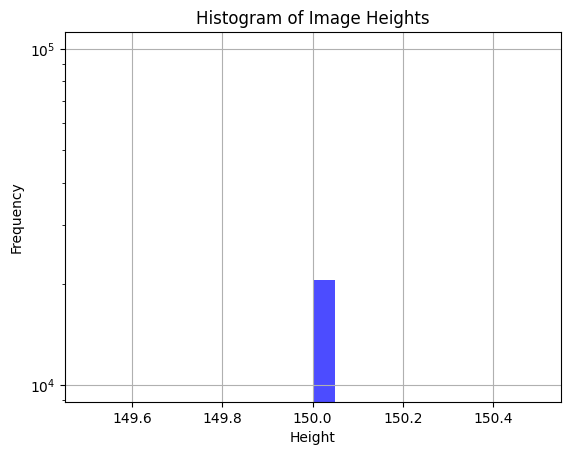

In [ ]:
heights = []
for img_path in all_images:
    with Image.open(img_path) as img:
        heights.append(img.size[1])

# Find the maximum and minimum image heights
max_height = max(heights)
min_height = min(heights)

# Print out the maximum and minimum sizes
print(f"The maximum image height is: {max_height} pixels")
print(f"The minimum image height is: {min_height} pixels")




threshold_max = 150  # Maximum acceptable height (adjust as needed)
threshold_min = 0  # Minimum acceptable height (adjust as needed)

num_too_big = sum(height > threshold_max for height in heights)
num_too_small = sum(height < threshold_min for height in heights)

print(f"Number of images exceeding {threshold_max}px height: {num_too_big}")
print(f"Number of images below {threshold_min}px height: {num_too_small}")


# Plot histogram of heights
#plt.hist(heights, bins=10, color='green', alpha=0.7)
plt.hist(widths, bins=20, color='blue', alpha=0.7, log=True)

plt.title('Histogram of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

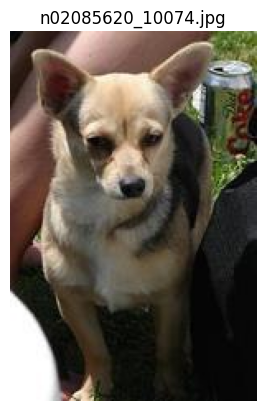

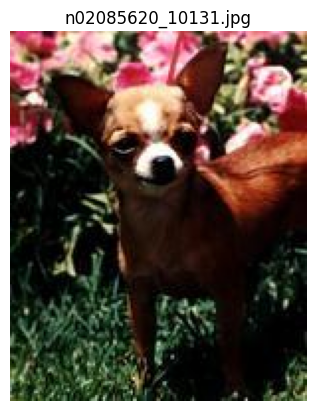

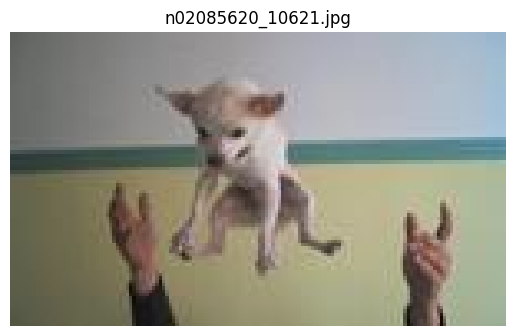

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Define a list of image paths (replace with your actual paths)
image_paths = [
    "/content/midterm/fully_resized_images/n02085620-Chihuahua/n02085620_10074.jpg",
    "/content/midterm/fully_resized_images/n02085620-Chihuahua/n02085620_10131.jpg",
    "/content/midterm/fully_resized_images/n02085620-Chihuahua/n02085620_10621.jpg"
]
plt.close('all')  # Clear matplotlib cache (optional)

# Loop through each image path
for image_path in image_paths:
  # Load the image
  image = Image.open(image_path)

  # Display the image
  plt.imshow(image)
  plt.axis('off')  # Hide the axis
  plt.title(os.path.basename(image_path))  # Add image name as title
  plt.show()

  # Optional: Clear the plot for the next image
  plt.clf()


**Split the data set**

In [ ]:
import os
from sklearn.model_selection import train_test_split

# Change directory to the images folder
os.chdir('/content/midterm/fully_resized_images')
#/content/midterm/fully_resized_images/n02085620-Chihuahua
# List all breed directories
breed_dirs = [d for d in os.listdir() if os.path.isdir(d)]
print(f"Total breeds: {len(breed_dirs)}")

# Dictionary to hold breed names and the number of images in each
breed_image_count = {}

# Loop through each breed directory to count images
for breed in breed_dirs:
  images = [img for img in os.listdir(breed) if img.endswith('.jpg')]
  breed_image_count[breed] = images
  print(f"Breed: {breed}, Image Count: {len(images)}")

  # Now, let's split the images into train and test sets for each breed
  train_set = {}
  test_set = {}

for breed, images in breed_image_count.items():
  # Split the list of image file names for the current breed
  train_imgs, test_imgs = train_test_split(images, test_size=0.2)  # 80-20 split
  train_set[breed] = train_imgs
  test_set[breed] = test_imgs

Total breeds: 120
Breed: n02088466-bloodhound, Image Count: 187
Breed: n02115641-dingo, Image Count: 156
Breed: n02089867-Walker_hound, Image Count: 153
Breed: n02105162-malinois, Image Count: 150
Breed: n02107574-Greater_Swiss_Mountain_dog, Image Count: 168
Breed: n02090622-borzoi, Image Count: 151
Breed: n02095314-wire-haired_fox_terrier, Image Count: 157
Breed: n02090379-redbone, Image Count: 148
Breed: n02088094-Afghan_hound, Image Count: 239
Breed: n02105056-groenendael, Image Count: 150
Breed: n02097047-miniature_schnauzer, Image Count: 154
Breed: n02096177-cairn, Image Count: 197
Breed: n02107908-Appenzeller, Image Count: 151
Breed: n02091244-Ibizan_hound, Image Count: 188
Breed: n02111277-Newfoundland, Image Count: 195
Breed: n02101006-Gordon_setter, Image Count: 153
Breed: n02087394-Rhodesian_ridgeback, Image Count: 172
Breed: n02112137-chow, Image Count: 196
Breed: n02090721-Irish_wolfhound, Image Count: 218
Breed: n02115913-dhole, Image Count: 150
Breed: n02085620-Chihuahua,

**Below we see the number of images in each split**

In [ ]:
# Print the count of images in each train and test set for every breed
for breed in train_set:
  print(f"Breed: {breed}, Train Count: {len(train_set[breed])}, Test Count: {len(test_set[breed])}")

Breed: n02088466-bloodhound, Train Count: 149, Test Count: 38
Breed: n02115641-dingo, Train Count: 124, Test Count: 32
Breed: n02089867-Walker_hound, Train Count: 122, Test Count: 31
Breed: n02105162-malinois, Train Count: 120, Test Count: 30
Breed: n02107574-Greater_Swiss_Mountain_dog, Train Count: 134, Test Count: 34
Breed: n02090622-borzoi, Train Count: 120, Test Count: 31
Breed: n02095314-wire-haired_fox_terrier, Train Count: 125, Test Count: 32
Breed: n02090379-redbone, Train Count: 118, Test Count: 30
Breed: n02088094-Afghan_hound, Train Count: 191, Test Count: 48
Breed: n02105056-groenendael, Train Count: 120, Test Count: 30
Breed: n02097047-miniature_schnauzer, Train Count: 123, Test Count: 31
Breed: n02096177-cairn, Train Count: 157, Test Count: 40
Breed: n02107908-Appenzeller, Train Count: 120, Test Count: 31
Breed: n02091244-Ibizan_hound, Train Count: 150, Test Count: 38
Breed: n02111277-Newfoundland, Train Count: 156, Test Count: 39
Breed: n02101006-Gordon_setter, Train Cou

**Create directories for both train set and test set**

In [ ]:
import os
import shutil

# Base directory where the images are stored
base_image_dir = '/content/midterm/Images'

# Directories for the general training and testing sets
general_train_dir = '/content/midterm/atrain_set'
general_test_dir = '/content/midterm/atest_set'

# Create the general training and testing directories
os.makedirs(general_train_dir, exist_ok=True)
os.makedirs(general_test_dir, exist_ok=True)

# Function to copy images to the respective breed-specific directories
def organize_images_by_breed(train_set, test_set, base_dir, general_train_dir, general_test_dir):
  for breed, train_imgs in train_set.items():
    # Create breed-specific directory in the general training directory
    breed_train_dir = os.path.join(general_train_dir, breed)
    os.makedirs(breed_train_dir, exist_ok=True)
    # Copy training images for this breed
    for img in train_imgs:
      src = os.path.join(base_dir, breed, img)
      dst = os.path.join(breed_train_dir, img)
      shutil.copy(src, dst)

  for breed, test_imgs in test_set.items():
    # Create breed-specific directory in the general testing directory
    breed_test_dir = os.path.join(general_test_dir, breed)
    os.makedirs(breed_test_dir, exist_ok=True)
    # Copy testing images for this breed
    for img in test_imgs:
      src = os.path.join(base_dir, breed, img)
      dst = os.path.join(breed_test_dir, img)
      shutil.copy(src, dst)

# Organize images into breed-specific directories
organize_images_by_breed(train_set, test_set, base_image_dir, general_train_dir, general_test_dir)

print(f"Training images organized in: {general_train_dir}")
print(f"Testing images organized in: {general_test_dir}")

Training images organized in: /content/midterm/atrain_set
Testing images organized in: /content/midterm/atest_set


**See the number of images in each breed for both train and test set**

In [ ]:
import os

# Function to list contents and count images in a directory
def list_contents_and_count(directory):
  breed_counts = {}
  for breed in os.listdir(directory):
    breed_path = os.path.join(directory, breed)
    if os.path.isdir(breed_path):
      images = os.listdir(breed_path)
      breed_counts[breed] = len(images)
      print(f"Breed: {breed}, Image Count: {len(images)}")
  return breed_counts

# Directories for the general training and testing sets
general_train_dir = '/content/midterm/atrain_set'
general_test_dir = '/content/midterm/atest_set'

# List and count images in the training directory
print("Training Set:")
train_breed_counts = list_contents_and_count(general_train_dir)

# List and count images in the testing directory
print("\nTesting Set:")
test_breed_counts = list_contents_and_count(general_test_dir)

Training Set:
Breed: n02088466-bloodhound, Image Count: 179
Breed: n02115641-dingo, Image Count: 150
Breed: n02089867-Walker_hound, Image Count: 146
Breed: n02105162-malinois, Image Count: 143
Breed: n02107574-Greater_Swiss_Mountain_dog, Image Count: 159
Breed: n02090622-borzoi, Image Count: 144
Breed: n02095314-wire-haired_fox_terrier, Image Count: 151
Breed: n02090379-redbone, Image Count: 144
Breed: n02088094-Afghan_hound, Image Count: 235
Breed: n02105056-groenendael, Image Count: 141
Breed: n02097047-miniature_schnauzer, Image Count: 147
Breed: n02096177-cairn, Image Count: 189
Breed: n02107908-Appenzeller, Image Count: 145
Breed: n02091244-Ibizan_hound, Image Count: 183
Breed: n02111277-Newfoundland, Image Count: 186
Breed: n02101006-Gordon_setter, Image Count: 145
Breed: n02087394-Rhodesian_ridgeback, Image Count: 163
Breed: n02112137-chow, Image Count: 191
Breed: n02090721-Irish_wolfhound, Image Count: 206
Breed: n02115913-dhole, Image Count: 144
Breed: n02085620-Chihuahua, Ima

**See total images in train set and test set**

In [ ]:
# Initialize lists to hold all training and testing images
all_train_imgs = []
all_test_imgs = []

# Iterate over each breed and extend the lists
for breed in train_set:
  all_train_imgs.extend(train_set[breed])
  all_test_imgs.extend(test_set[breed])

# Now, 'all_train_imgs' and 'all_test_imgs' contain all the images for training and testing
print(f"Total images in training set: {len(all_train_imgs)}")
print(f"Total images in testing set: {len(all_test_imgs)}")

Total images in training set: 16418
Total images in testing set: 4162


**Here we used the histogram to know the Pixal Values in the RGB channels**

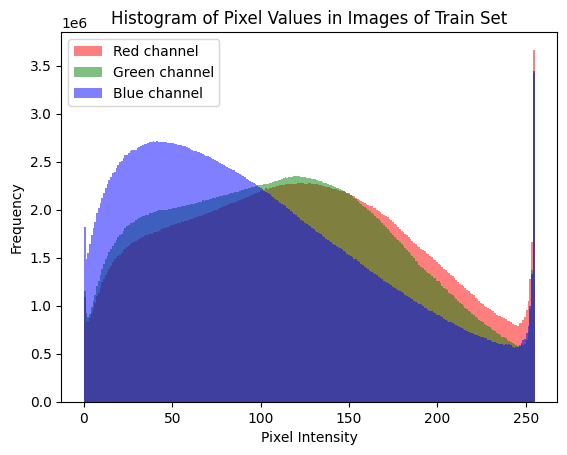

In [ ]:
import os
import numpy as np
from PIL import Image

# Function to load images from a directory and convert them into a NumPy array
def load_images(directory, target_size=(150, 150)):
    image_list = []
    for breed in os.listdir(directory):
        breed_path = os.path.join(directory, breed)
        if os.path.isdir(breed_path):
            for image_filename in os.listdir(breed_path):
                image_path = os.path.join(breed_path, image_filename)
                #image = Image.open(image_path).resize(target_size)
                image = Image.open(image_path).convert('RGB').resize(target_size)
                image_array = np.array(image) #/ 255.0  # Normalize pixel values
                image_list.append(image_array)
    return np.array(image_list)






# Load training and testing images
X_train = load_images(general_train_dir)
X_test = load_images(general_test_dir)

# Now you can flatten the channels as you did with the CIFAR-10 dataset
red_channel_train = X_train[:,:,:,0].flatten()
green_channel_train = X_train[:,:,:,1].flatten()
blue_channel_train = X_train[:,:,:,2].flatten()

#I created histogram for each color channel to visualize the distribution of pixel values.

plt.hist(red_channel_train, bins=256, color='red', alpha=0.5, label='Red channel')
plt.hist(green_channel_train, bins=256, color='green', alpha=0.5, label='Green channel')
plt.hist(blue_channel_train, bins=256, color='blue', alpha=0.5, label='Blue channel')
plt.title('Histogram of Pixel Values in Images of Train Set')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
import numpy as np

red_summary = np.percentile(red_channel_train, [0, 25, 50, 75, 100])
green_summary = np.percentile(green_channel_train, [0, 25, 50, 75, 100])
blue_summary = np.percentile(blue_channel_train, [0, 25, 50, 75, 100])

print("Red channel summary (Min, Q1, Median, Q3, Max):", red_summary)
print("Green channel summary (Min, Q1, Median, Q3, Max):", green_summary)
print("Blue channel summary (Min, Q1, Median, Q3, Max):", blue_summary)

Red channel summary (Min, Q1, Median, Q3, Max): [  0.  72. 120. 168. 255.]
Green channel summary (Min, Q1, Median, Q3, Max): [  0.  67. 113. 159. 255.]
Blue channel summary (Min, Q1, Median, Q3, Max): [  0.  50.  90. 142. 255.]


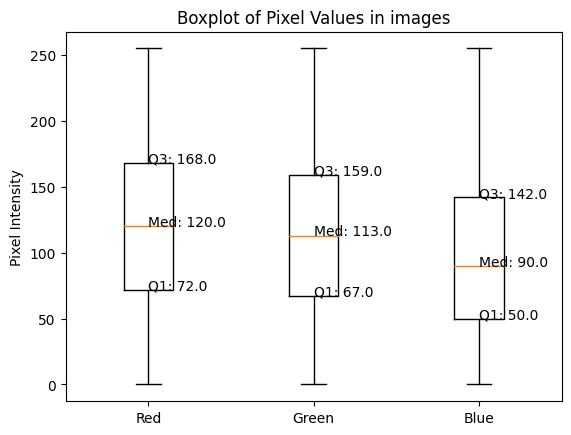

In [ ]:
plt.boxplot([red_channel_train, green_channel_train, blue_channel_train], labels=['Red', 'Green', 'Blue'])
plt.title('Boxplot of Pixel Values in images')
plt.ylabel('Pixel Intensity')

plt.text(1, red_summary[3], f'Q3: {red_summary[3]}')
plt.text(1, red_summary[2], f'Med: {red_summary[2]}')
plt.text(1, red_summary[1], f'Q1: {red_summary[1]}')

plt.text(2, green_summary[3], f'Q3: {green_summary[3]}')
plt.text(2, green_summary[2], f'Med: {green_summary[2]}')
plt.text(2, green_summary[1], f'Q1: {green_summary[1]}')

plt.text(3, blue_summary[3], f'Q3: {blue_summary[3]}')
plt.text(3, blue_summary[2], f'Med: {blue_summary[2]}')
plt.text(3, blue_summary[1], f'Q1: {blue_summary[1]}')



plt.show()

**We do the Same for test**

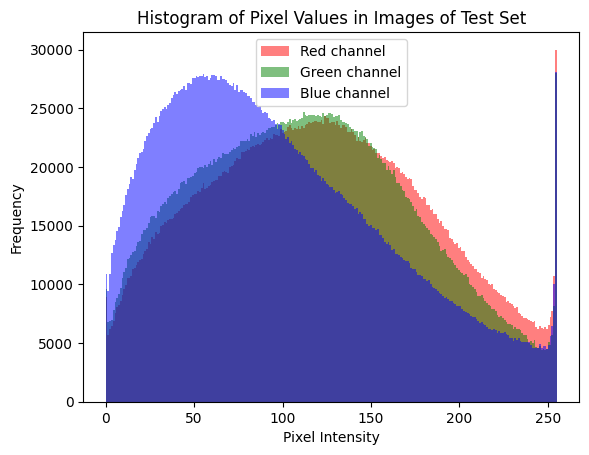

In [ ]:
import os
import numpy as np
from PIL import Image

# Function to load images from a directory and convert them into a NumPy array
def load_images(directory, target_size=(150, 150)):
    image_list = []
    for breed in os.listdir(directory):
        breed_path = os.path.join(directory, breed)
        if os.path.isdir(breed_path):
            for image_filename in os.listdir(breed_path):
                image_path = os.path.join(breed_path, image_filename)
                #image = Image.open(image_path).resize(target_size)
                image = Image.open(image_path).convert('RGB').resize(target_size)
                image_array = np.array(image) #/ 255.0  # Normalize pixel values
                image_list.append(image_array)
    return np.array(image_list)

# Load training and testing images
X_test = load_images(general_test_dir)

# Now you can flatten the channels as you did with the CIFAR-10 dataset
red_channel_test = X_test[:,:,:,0].flatten()
green_channel_test = X_test[:,:,:,1].flatten()
blue_channel_test = X_test[:,:,:,2].flatten()

#I created histogram for each color channel to visualize the distribution of pixel values.

plt.hist(red_channel_test, bins=256, color='red', alpha=0.5, label='Red channel')
plt.hist(green_channel_test, bins=256, color='green', alpha=0.5, label='Green channel')
plt.hist(blue_channel_test, bins=256, color='blue', alpha=0.5, label='Blue channel')
plt.title('Histogram of Pixel Values in Images of Test Set')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Assuming red_channel_test, green_channel_test, blue_channel_test are your data arrays
red_summary = np.percentile(red_channel_test, [0, 25, 50, 75, 100])
green_summary = np.percentile(green_channel_test, [0, 25, 50, 75, 100])
blue_summary = np.percentile(blue_channel_test, [0, 25, 50, 75, 100])

print("Red channel summary (Min, Q1, Median, Q3, Max):", red_summary)
print("Green channel summary (Min, Q1, Median, Q3, Max):", green_summary)
print("Blue channel summary (Min, Q1, Median, Q3, Max):", blue_summary)

Red channel summary (Min, Q1, Median, Q3, Max): [  0.  72. 119. 167. 255.]
Green channel summary (Min, Q1, Median, Q3, Max): [  0.  66. 113. 159. 255.]
Blue channel summary (Min, Q1, Median, Q3, Max): [  0.  49.  89. 141. 255.]


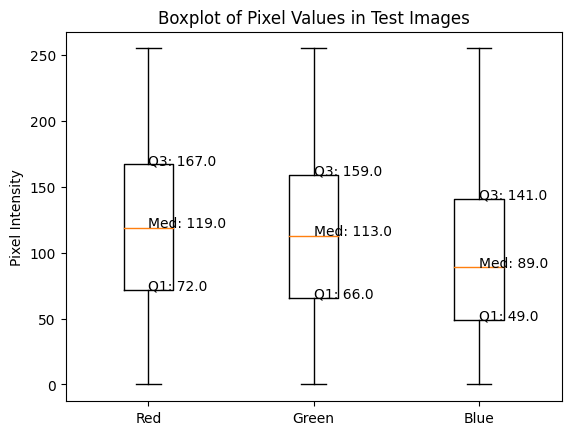

In [ ]:
plt.boxplot([red_channel_test, green_channel_test, blue_channel_test], labels=['Red', 'Green', 'Blue'])
plt.title('Boxplot of Pixel Values in Test Images')
plt.ylabel('Pixel Intensity')
# Annotate the Red channel
plt.text(1, red_summary[3], f'Q3: {red_summary[3]:.1f}')
plt.text(1, red_summary[2], f'Med: {red_summary[2]:.1f}')
plt.text(1, red_summary[1], f'Q1: {red_summary[1]:.1f}')

# Annotate the Green channel
plt.text(2, green_summary[3], f'Q3: {green_summary[3]:.1f}')
plt.text(2, green_summary[2], f'Med: {green_summary[2]:.1f}')
plt.text(2, green_summary[1], f'Q1: {green_summary[1]:.1f}')

# Annotate the Blue channel
plt.text(3, blue_summary[3], f'Q3: {blue_summary[3]:.1f}')
plt.text(3, blue_summary[2], f'Med: {blue_summary[2]:.1f}')
plt.text(3, blue_summary[1], f'Q1: {blue_summary[1]:.1f}')
plt.show()

**Splitting the normalized data set**

In [ ]:
import os

# Set directory containing normalized images
normalized_image_dir = '/content/midterm/normalized_images'

# Print the directory path for verification
print(f"Checking directory: {normalized_image_dir}")

# Loop through all files and subfolders recursively
for root, _, files in os.walk(normalized_image_dir):
    for filename in files:
        # Extract filename without extensions using removesuffix
        new_filename = os.path.splitext(filename)[0].removesuffix(".jpg") + '.npy'

        # Construct full paths (considering subfolders)
        old_path = os.path.join(root, filename)
        new_path = os.path.join(root, new_filename)

        # Print renaming details for tracking
        print(f"Renaming: {old_path} to {new_path}")

        try:
            # Attempt renaming the file
            os.rename(old_path, new_path)
        except Exception as e:
            # Handle potential errors during renaming
            print(f"Error renaming {old_path}: {e}")

print("Renaming process completed!")


Streaming output truncated to the last 5000 lines.
Renaming: /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_2648.npy to /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_2648.npy
Renaming: /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_1740.npy to /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_1740.npy
Renaming: /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_541.npy to /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_541.npy
Renaming: /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_3723.npy to /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_3723.npy
Renaming: /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_3826.npy to /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_3826.

**Verifying if the shape is same for all**

In [ ]:
import os
import numpy as np

# Set the base directory containing normalized images (replace with your path)
normalized_image_dir = '/content/midterm/normalized_images'

def check_and_print_shape(file_path):
  """
  Loads a NumPy array from the specified file path and prints its shape.

  Args:
    file_path (str): Path to the file containing the NumPy array (.npy).
  """
  try:
    data = np.load(file_path)
    print(f"Shape of {file_path}: {data.shape}")
  except FileNotFoundError:
    print(f"File not found: {file_path}")
  except (OSError, PermissionError) as e:
    print(f"Error accessing file {file_path}: {e}")

# Loop through all subdirectories in the normalized_image_dir
for breed_dir in os.listdir(normalized_image_dir):
  if os.path.isdir(os.path.join(normalized_image_dir, breed_dir)):
    # Construct the full path to the breed directory
    breed_path = os.path.join(normalized_image_dir, breed_dir)

    # Loop through all files within the breed directory
    for filename in os.listdir(breed_path):
      if filename.endswith('.npy'):
        # Construct the full path to the .npy file
        file_path = os.path.join(breed_path, filename)
        check_and_print_shape(file_path)



Streaming output truncated to the last 5000 lines.
Shape of /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_1310.npy: (150, 150, 3)
Shape of /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_2648.npy: (150, 150, 3)
Shape of /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_1740.npy: (150, 150, 3)
Shape of /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_541.npy: (150, 150, 3)
Shape of /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_3723.npy: (150, 150, 3)
Shape of /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_3826.npy: (150, 150, 3)
Shape of /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_2416.npy: (150, 150, 3)
Shape of /content/midterm/normalized_images/n02099849-Chesapeake_Bay_retriever/n02099849_3940.npy: (150, 150, 3)
Shape of /content/midterm/normalized_images/n0

In [ ]:
ls


n02085620-Chihuahua/                       n02100583-vizsla/
n02085782-Japanese_spaniel/                n02100735-English_setter/
n02085936-Maltese_dog/                     n02100877-Irish_setter/
n02086079-Pekinese/                        n02101006-Gordon_setter/
n02086240-Shih-Tzu/                        n02101388-Brittany_spaniel/
n02086646-Blenheim_spaniel/                n02101556-clumber/
n02086910-papillon/                        n02102040-English_springer/
n02087046-toy_terrier/                     n02102177-Welsh_springer_spaniel/
n02087394-Rhodesian_ridgeback/             n02102318-cocker_spaniel/
n02088094-Afghan_hound/                    n02102480-Sussex_spaniel/
n02088238-basset/                          n02102973-Irish_water_spaniel/
n02088364-beagle/                          n02104029-kuvasz/
n02088466-bloodhound/                      n02104365-schipperke/
n02088632-bluetick/                        n02105056-groenendael/
n02089078-black-and-tan_coonhound/         n021051

In [ ]:
!rm -rf /content/midterm/normalized_train_data /content/midterm/normalized_test_data


**Note**
Because the data set had 120 classes, it was difficult to loop through all of them in colab as each time I used classes more than 30 the RAM would run out and had to start afresh so this time we decide to take a sample of 25 classes and use that for modeling

In [ ]:
#Seing if data in the normalized_train_data folder is normalized
import numpy as np


train1 = '/content/midterm/normalized_train_data/n02085782-Japanese_spaniel/n02085782-Japanese_spaniel_0.npy'



# Load the data from the NumPy file
data = np.load(train1)

# Print the data
print(data)


[0.10196079 0.09411765 0.09803922 ... 0.35686275 0.5529412  0.59607846]


**Selecting a certain number of classes to use as the sample for the model**

In [ ]:
import os
import random

# Set directory containing normalized images (replace with your path)
normalized_image_dir = '/content/midterm/normalized_images'

# Get all class names (subdirectories)
all_classes = [d for d in os.listdir(normalized_image_dir) if os.path.isdir(os.path.join(normalized_image_dir, d))]

# Randomly select 10 classes (adjust the number as needed now we using 50 classes)
#selected_classes = random.sample(all_classes, 10)
selected_classes = all_classes[:25]

# Print the selected classes for verification
print("Selected Classes:", selected_classes)


Selected Classes: ['n02105505-komondor', 'n02107908-Appenzeller', 'n02096585-Boston_bull', 'n02093647-Bedlington_terrier', 'n02098413-Lhasa', 'n02102177-Welsh_springer_spaniel', 'n02097298-Scotch_terrier', 'n02115913-dhole', 'n02102480-Sussex_spaniel', 'n02088364-beagle', 'n02104029-kuvasz', 'n02100583-vizsla', 'n02102973-Irish_water_spaniel', 'n02097209-standard_schnauzer', 'n02106550-Rottweiler', 'n02086646-Blenheim_spaniel', 'n02112706-Brabancon_griffon', 'n02110958-pug', 'n02101388-Brittany_spaniel', 'n02086079-Pekinese', 'n02111500-Great_Pyrenees', 'n02107683-Bernese_mountain_dog', 'n02106030-collie', 'n02093754-Border_terrier', 'n02085782-Japanese_spaniel']


**The splitting the noramlized data to train set and test set**

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Function to load normalized image data
def load_image_data(image_path):
  """
  Loads a normalized image as a NumPy array.

  Args:
    image_path (str): Path to the normalized image file.

  Returns:
    np.ndarray: NumPy array representing the image data.
  """
  return np.load(image_path)

# Define minimum valid shape
min_valid_shape = (5,)  # Minimum number of features

# Function to filter elements with valid shapes
def filter_valid_data(data_list, min_shape):
  """
  Filters elements from a list that have shapes equal to or exceeding the minimum valid shape.

  Args:
    data_list (list): List of NumPy arrays representing data elements.
    min_shape (tuple): Minimum valid shape for data elements.

  Returns:
    list: Filtered list containing only elements with valid shapes.
  """
  return [data for data in data_list if data.shape >= min_shape]

# Function to split images for a class
def split_class_images(breed_dir, test_size=0.2):
  """
  Splits normalized images for a given class (breed) into train and test sets.

  Args:
    breed_dir (str): Path to the directory containing images for a specific class.
    test_size (float, optional): Proportion of images for the test set. Defaults to 0.2 (20%).

  Returns:
    tuple: Tuple containing two lists (train_images, test_images) of image paths.
  """
  all_images = [os.path.join(breed_dir, f) for f in os.listdir(breed_dir) if f.endswith('.npy')]
  train_images, test_images = train_test_split(all_images, test_size=test_size)
  return train_images, test_images

# Function to save flattened image data as NumPy array
def save_image_data(data, filename):
  """
  Saves flattened image data as a NumPy array to the specified file.

  Args:
    data (np.ndarray): NumPy array representing the flattened image data.
    filename (str): Path to the file where the data will be saved.
  """
  np.save(filename, data)


**This code removes the jpg that is attached to the name of data values e.g from image_name1.jpg.npy to image_name.npy**

In [ ]:
# Create train and test data directories if they don't exist (same as before)
train_data_dir = os.path.join('/content/midterm/normalized_train_data')
test_data_dir = os.path.join('/content/midterm/normalized_test_data')
os.makedirs(train_data_dir, exist_ok=True)
os.makedirs(test_data_dir, exist_ok=True)  # Create test_data_dir if it doesn't exist

# Loop through each breed directory (using selected classes)
for breed in selected_classes:
  if os.path.isdir(os.path.join(normalized_image_dir, breed)):  # Check if it's a directory
    # Construct the full path to the breed directory
    breed_dir = os.path.join(normalized_image_dir, breed)

    # Create subdirectories within train and test data dirs for the current breed (same as before)
    breed_train_dir = os.path.join(train_data_dir, breed)
    os.makedirs(breed_train_dir, exist_ok=True)  # Create breed directory in train data if it doesn't exist
    breed_test_dir = os.path.join(test_data_dir, breed)
    os.makedirs(breed_test_dir, exist_ok=True)  # Create breed directory in test data if it doesn't exist

    # Process Train and Test Images for the Current Class
    train_images, test_images = split_class_images(breed_dir)

    # Process Train Data
    valid_train_data = filter_valid_data([load_image_data(img_path) for img_path in train_images], min_valid_shape)
    train_data = [data.flatten() for data in valid_train_data]
    for i, data in enumerate(train_data):
      train_data_path = os.path.join(breed_train_dir, f"{breed}_{i}.npy")
      save_image_data(data, train_data_path)

    # Process Test Data (similar logic)
    valid_test_data = filter_valid_data([load_image_data(img_path) for img_path in test_images], min_valid_shape)
    test_data = [data.flatten() for data in valid_test_data]
    for i, data in enumerate(test_data):
      test_data_path = os.path.join(breed_test_dir, f"{breed}_{i}.npy")
      save_image_data(data, test_data_path)


In [ ]:
from collections import Counter
import os

# Path to the train data directory (replace with yours)
train_data_dir = '/content/midterm/normalized_train_data'

# Count train data for each breed
breed_counts = Counter()
for breed in os.listdir(train_data_dir):
  if os.path.isdir(os.path.join(train_data_dir, breed)):
    breed_counts[breed] = len(os.listdir(os.path.join(train_data_dir, breed)))

print("Train data counts per breed:")
for breed, count in breed_counts.items():
  print(f"{breed}: {count}")


Train data counts per breed:
n02105505-komondor: 123
n02107908-Appenzeller: 120
n02096585-Boston_bull: 145
n02093647-Bedlington_terrier: 145
n02098413-Lhasa: 148
n02102177-Welsh_springer_spaniel: 120
n02097298-Scotch_terrier: 126
n02115913-dhole: 120
n02102480-Sussex_spaniel: 120
n02088364-beagle: 156
n02104029-kuvasz: 120
n02100583-vizsla: 123
n02102973-Irish_water_spaniel: 120
n02097209-standard_schnauzer: 124
n02106550-Rottweiler: 121
n02086646-Blenheim_spaniel: 150
n02112706-Brabancon_griffon: 122
n02110958-pug: 160
n02101388-Brittany_spaniel: 121
n02086079-Pekinese: 119
n02111500-Great_Pyrenees: 170
n02107683-Bernese_mountain_dog: 174
n02106030-collie: 122
n02093754-Border_terrier: 137
n02085782-Japanese_spaniel: 148


**After splitting we now give integer labels to the classes in these splits labels**

In [ ]:
import os

# Path to the train data directory
train_data_dir = '/content/midterm/normalized_train_data'

# Get all breed names (class labels)
breed_names = os.listdir(train_data_dir)

# Create a dictionary to map breed names to integer labels
label_map = {breed: i for i, breed in enumerate(breed_names)}

# Print the label map
print("Label map:", label_map)


Label map: {'n02105505-komondor': 0, 'n02107908-Appenzeller': 1, 'n02096585-Boston_bull': 2, 'n02093647-Bedlington_terrier': 3, 'n02098413-Lhasa': 4, 'n02102177-Welsh_springer_spaniel': 5, 'n02097298-Scotch_terrier': 6, 'n02115913-dhole': 7, 'n02102480-Sussex_spaniel': 8, 'n02088364-beagle': 9, 'n02104029-kuvasz': 10, 'n02100583-vizsla': 11, 'n02102973-Irish_water_spaniel': 12, 'n02097209-standard_schnauzer': 13, 'n02106550-Rottweiler': 14, 'n02086646-Blenheim_spaniel': 15, 'n02112706-Brabancon_griffon': 16, 'n02110958-pug': 17, 'n02101388-Brittany_spaniel': 18, 'n02086079-Pekinese': 19, 'n02111500-Great_Pyrenees': 20, 'n02107683-Bernese_mountain_dog': 21, 'n02106030-collie': 22, 'n02093754-Border_terrier': 23, 'n02085782-Japanese_spaniel': 24}


In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical  # Not used in this cell

# Path to the train data directory (replace with yours)
train_data_dir = '/content/midterm/normalized_train_data'

# Define image dimensions
img_width, img_height = 150, 150

# **Copy the label_map variable assignment line here:**
label_map = {breed: i for i, breed in enumerate(os.listdir(train_data_dir))}

# Initialize empty lists for data and labels
X_train = []
y_train = []

# Loop through subdirectories (breeds)
for breed_dir in os.listdir(train_data_dir):
  if os.path.isdir(os.path.join(train_data_dir, breed_dir)):
    # Extract label (integer label using the map)
    label = label_map[breed_dir]

    # Loop through image files in the breed directory
    for filename in os.listdir(os.path.join(train_data_dir, breed_dir)):
      # Load image data
      image_path = os.path.join(train_data_dir, breed_dir, filename)
      image_data = np.load(image_path)

      # Reshape image if needed (assuming your data is currently 150x150x3)
      if image_data.shape != (img_width, img_height, 3):
        image_data = image_data.reshape((img_width, img_height, 3))

      # Append data and label
      X_train.append(image_data)
      y_train.append(label)

# Convert lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Print the shape of X_train (should be like (total_images, 150, 150, 3))
print("X_train shape:", X_train.shape)

# Convert labels to one-hot encoded format (categorical)
y_train_categorical = to_categorical(y_train, num_classes=len(label_map))


print("y_train:", y_train)
print(y_train.shape)


X_train shape: (3354, 150, 150, 3)
y_train: [ 0  0  0 ... 24 24 24]
(3354,)


**We do the same thing to the Test set**

In [ ]:
from collections import Counter
import os

# Path to the train data directory (replace with yours)
test_data_dir = '/content/midterm/normalized_test_data'

# Count train data for each breed
breed_counts = Counter()
for breed in os.listdir(test_data_dir):
  if os.path.isdir(os.path.join(test_data_dir, breed)):
    breed_counts[breed] = len(os.listdir(os.path.join(test_data_dir, breed)))

print("Train data counts per breed:")
for breed, count in breed_counts.items():
  print(f"{breed}: {count}")


Train data counts per breed:
n02105505-komondor: 31
n02107908-Appenzeller: 31
n02096585-Boston_bull: 37
n02093647-Bedlington_terrier: 37
n02098413-Lhasa: 38
n02102177-Welsh_springer_spaniel: 30
n02097298-Scotch_terrier: 32
n02115913-dhole: 30
n02102480-Sussex_spaniel: 31
n02088364-beagle: 39
n02104029-kuvasz: 30
n02100583-vizsla: 31
n02102973-Irish_water_spaniel: 30
n02097209-standard_schnauzer: 31
n02106550-Rottweiler: 31
n02086646-Blenheim_spaniel: 38
n02112706-Brabancon_griffon: 31
n02110958-pug: 40
n02101388-Brittany_spaniel: 31
n02086079-Pekinese: 30
n02111500-Great_Pyrenees: 43
n02107683-Bernese_mountain_dog: 44
n02106030-collie: 31
n02093754-Border_terrier: 35
n02085782-Japanese_spaniel: 37


In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical

# Path to the train data directory (replace with yours)
test_data_dir = '/content/midterm/normalized_test_data'

# Define image dimensions
img_width, img_height = 150, 150

# **Copy the label_map variable assignment line from Cell 1 here:**
label_map = {breed: i for i, breed in enumerate(os.listdir(test_data_dir))}

# Initialize empty lists for data and labels
X_test = []
y_test = []

# Loop through subdirectories (breeds)
for breed_dir in os.listdir(test_data_dir):
  if os.path.isdir(os.path.join(test_data_dir, breed_dir)):
    # Extract label (integer label using the map)
    label = label_map[breed_dir]

    # Loop through image files in the breed directory
    for filename in os.listdir(os.path.join(test_data_dir, breed_dir)):
      # Load image data
      image_path = os.path.join(test_data_dir, breed_dir, filename)
      image_data = np.load(image_path)

      # Reshape image if needed (assuming your data is currently 150x150x3)
      if image_data.shape != (img_width, img_height, 3):
        image_data = image_data.reshape((img_width, img_height, 3))

      # Append data and label
      X_test.append(image_data)
      y_test.append(label)

# Convert labels to one-hot encoded format (categorical)
y_test_categorical = to_categorical(y_test, num_classes=len(label_map))

# Convert lists to NumPy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Print the shape of X_train (should be like (total_images, 150, 150, 3))
print("X_test shape:", X_test.shape)


print("y_test_categorical :", y_test_categorical)
# Print the shape of y_test_categorical (should be like (total_images, num_classes))
print("y_test_categorical shape:", y_test_categorical.shape)

X_test shape: (849, 150, 150, 3)
y_test_categorical : [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
y_test_categorical shape: (849, 25)


In [ ]:
print(X_train.shape)

(3354, 150, 150, 3)


**CNN Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, History  # Import both callbacks

# Assuming X_train has shape (num_samples, height, width, channels)
# Assuming y_train_categorical is the one-hot encoded labels for training
# Assuming X_test and y_test_categorical are your validation data

# Calculate the number of classes from y_train_categorical
num_classes = y_train_categorical.shape[1]

# Define the CNN model
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))




# Add another convolutional layer (optional)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Flatten the feature maps
model.add(Flatten())

# Add dense layers for classification
model.add(Dense(32, activation='relu'))  # Adjust the number of neurons as needed
model.add(Dense(num_classes, activation='softmax'))  # Output layer with class count

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create EarlyStopping and History callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')
history = History()

# Train the model with validation data and callbacks
model.fit(X_train, y_train_categorical,  # Use y_train_categorical here
batch_size=32,
epochs=100,  # Adjust epochs as needed
validation_data=(X_test, y_test_categorical),  # Use y_test_categorical here
callbacks=[early_stopping, history])

Epoch 1/100
105/105 [==============================] - 80s 742ms/step - loss: 3.2014 - accuracy: 0.0611 - val_loss: 3.0890 - val_accuracy: 0.0942
Epoch 2/100
105/105 [==============================] - 83s 790ms/step - loss: 2.9911 - accuracy: 0.1151 - val_loss: 2.8883 - val_accuracy: 0.1331
Epoch 3/100
105/105 [==============================] - 80s 765ms/step - loss: 2.6841 - accuracy: 0.1860 - val_loss: 2.7510 - val_accuracy: 0.1673
Epoch 4/100
105/105 [==============================] - 81s 765ms/step - loss: 2.3661 - accuracy: 0.2776 - val_loss: 2.8895 - val_accuracy: 0.1602
Epoch 5/100
105/105 [==============================] - 81s 771ms/step - loss: 1.9673 - accuracy: 0.3939 - val_loss: 3.0788 - val_accuracy: 0.1637
Epoch 6/100
105/105 [==============================] - 79s 750ms/step - loss: 1.4767 - accuracy: 0.5343 - val_loss: 3.3760 - val_accuracy: 0.1673
Epoch 7/100
105/105 [==============================] - 82s 781ms/step - loss: 0.9956 - accuracy: 0.6941 - val_loss: 4.0378 -

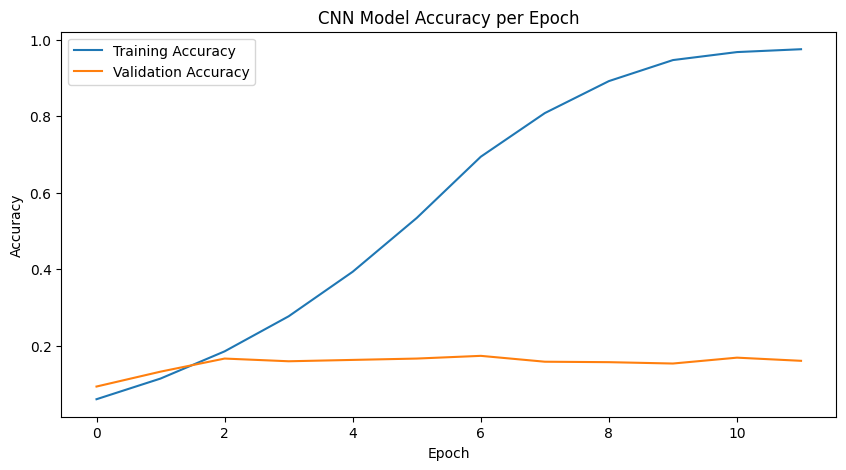

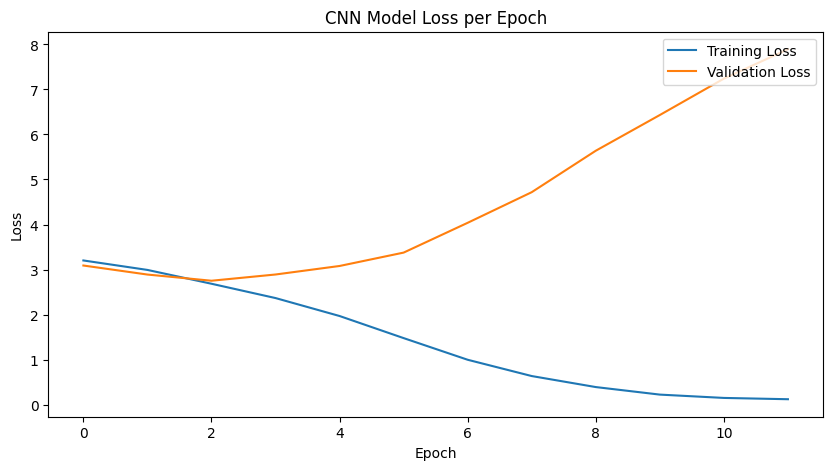

In [ ]:
# Plotting accuracy per epoch
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plotting loss per epoch
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [ ]:
from tensorflow.keras.utils import to_categorical



# Evaluate the model on the test set
model.evaluate(X_test, y_test_categorical)  # Use y_test_categorical here


27/27 [==============================] - 6s 220ms/step - loss: 7.8934 - accuracy: 0.1614


[7.8934478759765625, 0.1613663136959076]

**Note** Clearly the model is not performing well with the test set and we shall need to adjust parameters accordingly in training as it is performing well with train set meaning there's overfitting.This could be also because the sample used was small. So we shall have to adjust and create a better one.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming you have X_test

y_pred = np.argmax(model.predict(X_test), axis=-1)  # Get class with highest probability

# Ensure y_test contains integer labels (not one-hot encoded)
if y_test.ndim > 1:  # Check if y_test is one-hot encoded
    y_test = np.argmax(y_test, axis=-1)  # Decode labels if necessary

# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

print("Classification Report:")
print(report)


27/27 [==============================] - 3s 113ms/step
Classification Report:
{'0': {'precision': 0.16666666666666666, 'recall': 0.1935483870967742, 'f1-score': 0.1791044776119403, 'support': 31}, '1': {'precision': 0.125, 'recall': 0.0967741935483871, 'f1-score': 0.10909090909090909, 'support': 31}, '2': {'precision': 0.09090909090909091, 'recall': 0.05405405405405406, 'f1-score': 0.06779661016949154, 'support': 37}, '3': {'precision': 0.09523809523809523, 'recall': 0.05405405405405406, 'f1-score': 0.06896551724137931, 'support': 37}, '4': {'precision': 0.1111111111111111, 'recall': 0.15789473684210525, 'f1-score': 0.13043478260869565, 'support': 38}, '5': {'precision': 0.13333333333333333, 'recall': 0.13333333333333333, 'f1-score': 0.13333333333333333, 'support': 30}, '6': {'precision': 0.12, 'recall': 0.09375, 'f1-score': 0.10526315789473684, 'support': 32}, '7': {'precision': 0.32142857142857145, 'recall': 0.3, 'f1-score': 0.3103448275862069, 'support': 30}, '8': {'precision': 0.2,

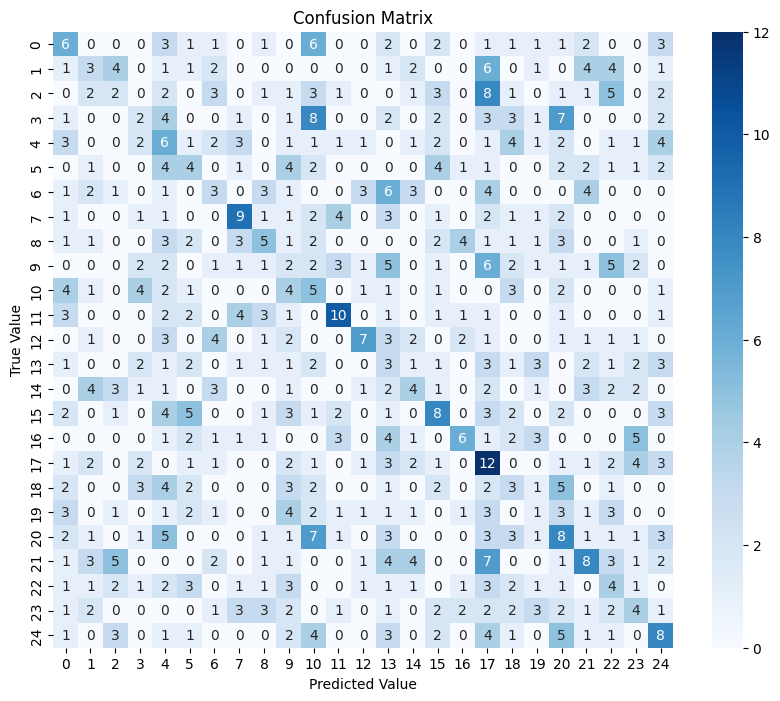

In [ ]:
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

**Important! Don't delete**


**The code below describes other files**

In [ ]:
import tarfile
!tar -xf lists.tar  # This command uses the shell to untar the archive


In [ ]:
import scipy.io

# Load your MAT data file
train_list = scipy.io.loadmat('train_list.mat')
print(train_list)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct  9 08:36:13 2011', '__version__': '1.0', '__globals__': [], 'file_list': array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
      dtype=object), 'annotation_list': array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754'], dtype='<U44')],
       [array(['n0211

In [ ]:
import scipy.io

# Load your MAT data file
test_list = scipy.io.loadmat('test_list.mat')
print(test_list)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct  9 08:36:13 2011', '__version__': '1.0', '__globals__': [], 'file_list': array([[array(['n02085620-Chihuahua/n02085620_2650.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_4919.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_1765.jpg'], dtype='<U38')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_3635.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_2988.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_6330.jpg'], dtype='<U48')]],
      dtype=object), 'annotation_list': array([[array(['n02085620-Chihuahua/n02085620_2650'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_4919'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_1765'], dtype='<U34')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_3635'], dtype='<U44')],
       [array(['n0211

In [ ]:
import scipy.io

# Load your MAT data file
file_list = scipy.io.loadmat('file_list.mat')
print(file_list)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct  9 08:29:09 2011', '__version__': '1.0', '__globals__': [], 'file_list': array([[array(['n02085620-Chihuahua/n02085620_10074.jpg'], dtype='<U39')],
       [array(['n02085620-Chihuahua/n02085620_10131.jpg'], dtype='<U39')],
       [array(['n02085620-Chihuahua/n02085620_10621.jpg'], dtype='<U39')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_9829.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9844.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9924.jpg'], dtype='<U48')]],
      dtype=object), 'annotation_list': array([[array(['n02085620-Chihuahua/n02085620_10074'], dtype='<U35')],
       [array(['n02085620-Chihuahua/n02085620_10131'], dtype='<U35')],
       [array(['n02085620-Chihuahua/n02085620_10621'], dtype='<U35')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_9829'], dtype='<U44')],
       [array([

**Note**

**the file_list.mat, train_list.mat, and test_list.mat** files are not directly used as values for your training or test sets. Instead, they serve as indices or references to help you locate and organize the images and their corresponding labels for the training and testing phases of your model. Here's a breakdown of their purposes:

•  **file_list.mat:** Provides a complete list of all image files in the dataset, which can be useful for tasks like feature extraction or data exploration.

•  **train_list.mat:** Contains paths and labels for the images that should be used for training your model. It helps you to easily access and identify which images and labels to use during the training process.

•  **test_list.mat:** Contains paths and labels for the images that should be used for testing your model. It's used to evaluate the model's performance after training, ensuring that the evaluation is done on data that the model hasn't seen before.

These files help maintain the structure of your dataset and ensure that you're using the correct data for each part of the machine learning workflow.

**See Example Below**

In [ ]:
import scipy.io

# Load the lists
file_list = scipy.io.loadmat('file_list.mat')['file_list']
train_list = scipy.io.loadmat('train_list.mat')['file_list']
test_list = scipy.io.loadmat('test_list.mat')['file_list']

# Example: Print the first file path from the training list
first_train_image_path = train_list[0][0][0]
print("First training image path:", first_train_image_path)

# Assuming the label is part of the file path, extract the label
# Typically, the label might be the directory name
first_train_image_label = first_train_image_path.split('/')[0]
print("First training image label:", first_train_image_label)

print("\n")

# Example: Print the first file path from the test list
first_test_image_path = test_list[0][0][0]
print("First test image path:", first_test_image_path)

# Assuming the label is part of the file path, extract the label
# Typically, the label might be the directory name
first_test_image_label = first_test_image_path.split('/')[0]
print("First test image label:", first_test_image_label)

First training image path: n02085620-Chihuahua/n02085620_5927.jpg
First training image label: n02085620-Chihuahua


First test image path: n02085620-Chihuahua/n02085620_2650.jpg
First test image label: n02085620-Chihuahua


In [ ]:
from scipy.io import loadmat
train_data = loadmat('train_data.mat')
test_data = loadmat('test_data.mat')



**Note:**
First we are going to dissect the test_data.mat and train_data.mat

In [ ]:
import scipy.io
import numpy as np

# Load your MAT data file (replace 'train_data.mat' with the actual filename)
data = scipy.io.loadmat('train_data.mat')

# Check if 'train_data' is a NumPy array (assuming this is the variable containing your features)
if not isinstance(data['train_data'], np.ndarray):
    print("Data is not a NumPy array. Consider using different access methods provided by scipy.io.")
else:
    # Get the shape of the feature matrix
    train_data_shape = data['train_data'].shape
    print("Shape of the training data:", train_data_shape)


Shape of the training data: (12000, 12000)


In [ ]:
import scipy.io
import numpy as np

 # Load your MAT data file (replace 'train_data.mat' with the actual filename)
data = scipy.io.loadmat('train_data.mat')

# Print the keys of the data dictionary to find the variable names
print(data.keys())

 # Assuming 'train_features' is the key containing the features
train_data = data.get('train_data', None)
train_info = data['train_info']

 # Check if train_data exists and is a NumPy array
if train_data is None:
    print("Key 'train_data' does not exist in the data.")
elif not isinstance(train_data, np.ndarray):
    print("Data is not a NumPy array. Consider using different access methods provided by scipy.io.")
else:
 # Get the shape of the feature matrix
     train_data_shape = train_data.shape
     print("Shape of the training data:", train_data_shape)




dict_keys(['__header__', '__version__', '__globals__', 'train_info', 'train_fg_data', 'train_data'])
Shape of the training data: (12000, 12000)


In [ ]:
import scipy.io
import numpy as np

 # Load your MAT data file (replace 'train_data.mat' with the actual filename)
test_data = scipy.io.loadmat('test_data.mat')

# Print the keys of the data dictionary to find the variable names
print(test_data.keys())

 # Assuming 'train_features' is the key containing the features
test_data = test_data.get('test_data', None)

 # Check if train_data exists and is a NumPy array
if test_data is None:
    print("Key 'test_data' does not exist in the data.")
elif not isinstance(test_data, np.ndarray):
    print("Data is not a NumPy array. Consider using different access methods provided by scipy.io.")
else:
 # Get the shape of the feature matrix
     test_data_shape = test_data.shape
     print("Shape of the test_data :", test_data_shape)

dict_keys(['__header__', '__version__', '__globals__', 'test_info', 'test_fg_data', 'test_data'])
Shape of the test_data : (8580, 12000)


**Note**

1.**train_fg_data and test_fg_data** contain the feature matrices before applying the histogram intersection kernel. These matrices represent the raw features extracted from the images.

2.**train_data and test_data** contain the feature matrices after the histogram intersection kernel has been applied.

**In short**  train_fg_data and test_fg_data are the raw features, while train_data and test_data are the processed features ready for use in training and testing your models.

In [ ]:
print("Fields in train_data:", train_data.dtype.names)
print("Fields in train_info:", train_info.dtype.names)


Fields in train_data: None
Fields in train_info: ('file_list', 'annotation_list', 'labels', 'fg_ids')


In [ ]:
import scipy.io

# Load your MAT data file
train_data = scipy.io.loadmat('train_data.mat')

# Access the 'train_info' variable
train_data = data['train_data']

# Check the type of 'train_info'
print("Type of train_data:", type(train_data))

# If it's a NumPy array or a similar iterable, you can check its shape
if isinstance(train_data, np.ndarray):
    print("Shape of train_data:", train_data.shape)

# To see the actual data, you can print it directly if it's not too large
print("Contents of train_data:", train_data)

Type of train_data: <class 'numpy.ndarray'>
Shape of train_data: (12000, 12000)
Contents of train_data: [[1.         0.37021212 0.38627623 ... 0.21216631 0.33752761 0.26825407]
 [0.37021212 1.         0.45434285 ... 0.14359524 0.3095     0.17709522]
 [0.38627623 0.45434285 1.         ... 0.16968838 0.28702648 0.20437348]
 ...
 [0.21216631 0.14359524 0.16968838 ... 1.         0.22314713 0.41941136]
 [0.33752761 0.3095     0.28702648 ... 0.22314713 1.         0.31585238]
 [0.26825407 0.17709522 0.20437348 ... 0.41941136 0.31585238 1.        ]]


**Interpretation**
1. Type: train_data is a NumPy array, which is a powerful N-dimensional array object that provides fast array-oriented arithmetic operations and flexible broadcasting capabilities.
2. Shape: The shape of train_data is (12000, 12000), which means it is a square matrix with 12,000 rows and 12,000 columns. This is a very large matrix, and each element of the matrix represents some form of data.
3. Contents: The contents of train_data are numerical values that range between 0 and 1. The diagonal elements of the matrix are all 1s, which suggests that this could be some form of similarity matrix or kernel matrix where each row and column represents a feature vector for an image, and the value at train_data[i][j] represents the similarity or relationship between the feature vectors i and j. The fact that the diagonal is all 1s indicates that each feature vector is perfectly similar to itself, as expected.



In [ ]:
print("Fields in train_data:", train_data.dtype.names)


Fields in train_data: None


In [ ]:
field_data = train_data[0][0]
print("Data in field_data:", field_data)

Data in field_data: 1.0000000000000022


In [ ]:
train_labels = train_info['labels'][0]
print("Data in field_name:", train_labels)

Data in field_name: [array([[  1],
        [  1],
        [  1],
        ...,
        [120],
        [120],
        [120]], dtype=uint8)]


In [ ]:
import scipy.io

# Load your MAT data file
data = scipy.io.loadmat('train_data.mat')

# Access the 'train_info' variable
train_info = data['train_info']

# Check the type of 'train_info'
print("Type of train_info:", type(train_info))

# If it's a NumPy array or a similar iterable, you can check its shape
if isinstance(train_info, np.ndarray):
    print("Shape of train_info:", train_info.shape)

# To see the actual data, you can print it directly if it's not too large
print("Contents of train_info:", train_info)

Type of train_info: <class 'numpy.ndarray'>
Shape of train_info: (1, 1)
Contents of train_info: [[(array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
         [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
         [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
         ...,
         [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
         [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
         [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
        dtype=object), array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
         [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
         [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
         ...,
         [array(['n02116738-African_hunting_dog/n02116738_6754'], dtype='<U44')],
         [array(['n02116738-African_hunting_dog/n02116738_9333'], dty

**Remember**

train_info/test_info : contains the labels and ids for the corresponding image in the feature matrix

**Now let's dissect test_data.mat**

In [ ]:
import scipy.io
import numpy as np

 # Load your MAT data file (replace 'test_data.mat' with the actual filename)
data = scipy.io.loadmat('test_data.mat')

 # Access the 'test_info' variable from the data dictionary
test_info = data['test_info']

 # Check the type of 'test_info'
print("Type of test_info:", type(test_info))

# If it's a NumPy structured array, you can check its fields
if isinstance(test_info, np.ndarray) and test_info.dtype.names is not None:
   print("Fields in test_info:", test_info.dtype.names)
else:
   print("test_info does not contain named fields.")

Type of test_info: <class 'numpy.ndarray'>
Fields in test_info: ('file_list', 'annotation_list', 'labels', 'fg_ids')


In [ ]:
field_data = test_info['labels'][0]
print("Data in field_name:", field_data)

Data in field_name: [array([[  1],
        [  1],
        [  1],
        ...,
        [120],
        [120],
        [120]], dtype=uint8)]


In [ ]:

print("Fields in train_info:", train_info.dtype.names)


Fields in train_info: ('file_list', 'annotation_list', 'labels', 'fg_ids')


In [ ]:
field_data = train_info['labels'][0]
print("Data in field_name:", field_data)

Data in field_name: [array([[  1],
        [  1],
        [  1],
        ...,
        [120],
        [120],
        [120]], dtype=uint8)]


In [ ]:
!ls

annotation.tar	Images	    lists.tar	   test_list.mat   train_list.mat
file_list.mat	images.tar  test_data.mat  train_data.mat


In [ ]:
import scipy.io

# Load your MAT data file
train_data = scipy.io.loadmat('train_data.mat')

# Extract the file list and other relevant information
file_list = train_data['train_info'][0][0][0][0]
labels = train_data['train_info'][0][0][2][0]
features = train_data['train_fg_data']

# Find the index of your image
image_name = 'n02085620-Chihuahua/n02085620_5927.jpg'
image_index = None
for index, file in enumerate(file_list):
    if file[0] == image_name:
        image_index = index
        break

# Check if the image was found and print its details
if image_index is not None:
    print(f"Image found at index: {image_index}")
    print(f"Title: {image_name}")
    # Access label for the image
    # If labels is a 1D array, you don't need a second index
    print(f"Label: {labels[image_index]}")
    # Access features for the image
    # Assuming features is a 2D array where rows correspond to images
    print(f"Features: {features[image_index, :]}")
else:
    print("Image not found in the file list.")

Image found at index: 0
Title: n02085620-Chihuahua/n02085620_5927.jpg
Label: 1
Features: [0.0004329  0.0002886  0.0002886  ... 0.00039683 0.00032468 0.0023088 ]


In [ ]:

import scipy.io

# Load your MAT data file
train_data = scipy.io.loadmat('train_data.mat')

# Extract the features and labels
features = train_data['train_fg_data']
labels = train_data['train_info'][0][0][2]

# Ensure labels is a 1D array with the same length as the number of feature samples
# Flatten the array if necessary
labels = labels.flatten()

# Now, check the shapes of features and labels
print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")

Features shape: (12000, 5376)
Labels shape: (12000,)
